# Face Detection

Talvez uma das abordagens mais populares seja chamada de " Rede Neural Convolucional em Cascata Multi-Tarefa ", ou simplesmente MTCNN, descrita por Kaipeng Zhang , et al. no artigo de 2016 intitulado “ Joint Face Detection and Alignment using Multitask Cascaded Convolutional Networks ”

O MTCNN é popular porque alcançou resultados de última geração em uma variedade de conjuntos de dados de referência e porque também é capaz de reconhecer outras características faciais, como olhos e boca, chamadas de detecção de pontos de referência.

A rede usa uma estrutura em cascata com três redes; primeiro, a imagem é redimensionada para uma gama de tamanhos diferentes (chamada de pirâmide de imagem), então o primeiro modelo (Rede de Proposta ou P-Net) propõe regiões faciais candidatas, o segundo modelo (Rede Refina ou R-Net) filtra as caixas delimitadoras e o terceiro modelo (Output Network ou O-Net) propõe marcos faciais.

As CNNs propostas consistem em três etapas. No primeiro estágio, ele produz janelas candidatas rapidamente por meio de uma CNN rasa. Em seguida, ele refina as janelas para rejeitar um grande número de janelas sem rosto por meio de uma CNN mais complexa. Finalmente, ele usa um CNN mais poderoso para refinar o resultado e as posições dos marcos faciais de saída.

https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

In [1]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 5.7MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

In [25]:
# load image from file
#filename = '/content/drive/MyDrive/0. Business/2. Consultoria em Dados/2. IA, ML/0. Scripts, Exemplos, Cursos/Scripts exemplos/Face Detection/test1.jpg'
#filename2 = '/content/drive/MyDrive/0. Business/2. Consultoria em Dados/2. IA, ML/0. Scripts, Exemplos, Cursos/Scripts exemplos/Face Detection/test2.jpg'
#pixels = pyplot.imread(filename)
#pixels2 = pyplot.imread(filename2)

In [43]:
# load image from file
filename = '/content/drive/MyDrive/0. Business/2. Consultoria em Dados/2. IA, ML/0. Scripts, Exemplos, Cursos/Scripts exemplos/Face Detection/test3.jpg'
pixels = pyplot.imread(filename)

In [44]:
# create the detector, using default weights
detector = MTCNN()

In [45]:
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
	print(face)

{'box': [6, 91, 120, 142], 'confidence': 0.9999188184738159, 'keypoints': {'left_eye': (41, 160), 'right_eye': (88, 140), 'nose': (81, 172), 'mouth_left': (62, 204), 'mouth_right': (109, 183)}}
{'box': [177, 38, 154, 167], 'confidence': 0.9978826642036438, 'keypoints': {'left_eye': (214, 125), 'right_eye': (257, 88), 'nose': (247, 129), 'mouth_left': (250, 169), 'mouth_right': (290, 137)}}
{'box': [140, 149, 54, 67], 'confidence': 0.9941415190696716, 'keypoints': {'left_eye': (160, 171), 'right_eye': (186, 175), 'nose': (174, 182), 'mouth_left': (159, 196), 'mouth_right': (182, 201)}}


In [46]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
    # draw the dots (desenhar os pontos)
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()

In [47]:
# detect faces in the image
faces = detector.detect_faces(pixels)

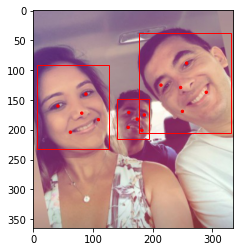

In [48]:
draw_image_with_boxes(filename, faces)

Separando cada rosto

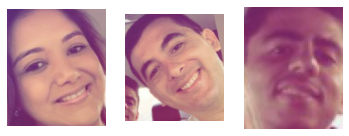

In [55]:
# extract and plot each detected face in a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])
	# show the plot
	pyplot.show()

filename = '/content/drive/MyDrive/0. Business/2. Consultoria em Dados/2. IA, ML/0. Scripts, Exemplos, Cursos/Scripts exemplos/Face Detection/test3.jpg'
# load image from file
pixels = pyplot.imread(filename)

# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)

Vendo a imagem 2, com mais rostos

In [52]:
# load image from file
filename2 = '/content/drive/MyDrive/0. Business/2. Consultoria em Dados/2. IA, ML/0. Scripts, Exemplos, Cursos/Scripts exemplos/Face Detection/test4.jpg'
pixels2 = pyplot.imread(filename2)

In [53]:
# detect faces in the image
faces2 = detector.detect_faces(pixels2)

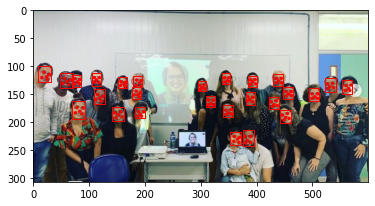

In [54]:
draw_image_with_boxes(filename2, faces2)

Pegando cada rosto separadamente

In [56]:
# extract and plot each detected face in a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])
	# show the plot
	pyplot.show()

filename = '/content/drive/MyDrive/0. Business/2. Consultoria em Dados/2. IA, ML/0. Scripts, Exemplos, Cursos/Scripts exemplos/Face Detection/test4.jpg'
# load image from file
pixels = pyplot.imread(filename)

# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)